# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Put your name here.</p>

---
---
## ABM+OPP and Graph

In this homework, we have three sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**
- **Part C: Graph and NetwrokX**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 3.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part A: Upload this file to your Git repository to track your progress on your assignment (5 points)

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s23-turnin` repository and create a new directory called `hw-03`.
2. Move this notebook into that **new directory**, then **add** and **commit** it.
1. Finally, to test that everything is working, `git push` the file so that it ends up in your GitHub repository.

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



### &#128721; STOP
**Make sure you have committed your changes and pushed to your Git repository!**


---
## Part B.1: Load necessary modules


**At the end of Part B, you should see a move like the on in the cell below. You will also plot some curves of population versus time similar to those below.**



---
Execute the next two Code cells to load python packages for math and visualization functions.

In [1]:
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output

The Code cell below is found online, which allows scatter plot to use image as the markers.

In [2]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


**&#9989; Do This**: Download the image files of `M-light.png`, `M-dark.png`, and `Hawk.png` from the links below. Put them in the same folder as your notebook file. You will need them to visualize your simulation.

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/M-light.png" alt="M_light" border="0" align="left">  
  
https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/M-light.png

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/M-dark.png" alt="M_dark" border="0" align="left">  https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/M-dark.png 

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/Hawk.png" alt="hawk" border="0" align="left">  https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/Hawk.png




---
## Part B.2: Problem Statement

This homework problem is inspired by a ABM model on [NetLogo]( https://ccl.northwestern.edu/netlogo/models/NaturalSelection-Camouflage). You are creating a simple ecosystem containing two types of animals: mice and hawks.

1. **The universe is on a rock hill.** Let's set a boundary of this universe. ==> The domain of the world is $10 <x < 110$ and $10 < y < 110$.
1. **There are rock pocket mice.**
1. **Each mouse has the following properties: location, age, alleles, sex, and fur_color.**
1. **All mice have three methods/functions: roaming, aging, and draw.**
1. You will create two mouse classes.: male mouse (**mickey**) and female mouse (**minnie**) based on the general mouse class.

1. **Female mice have one more method/function: litter.** 
1. **The preditors are hawks.**
1. **Hawk classes have one property: location.**
1. **Hawk classes have three methods/functions: roaming, draw, and hunt.**
1. You can create hawk classes based on the mouse class because they have similar functions.
1. **Note here** your main tasks are creating mice and hawk classes. The codes for simulations are already functioning. You will only need to add some functions on them. **Take a look of those codes to ensure your objects will be compatible with them** before you create the objects.


---
### B.2.1 General mouse classes
Here, we have the gen-1 **mouse class** in the cell below. Study it and understand what it will do. 

In [ ]:
class mouse():

    '''
    A mouse class. It has properties of location, age, and sex.
    It has methods of set_allele, set_sex, draw, and aging.
    '''
    
    def __init__(self):
        '''
        The inital location is randomly assigned on the grid.
        The inital age of this mouse is zero. 
        '''
        
        self.x = random.randint(10, 110)
        self.y = random.randint(10, 110)
        
        self.age = 0 
        

        
    def set_allele(self, alle_d, alle_m):
        '''
        Method to set the alleles of this mouse: alle_d and alle_m from dad and mom, respectively.
        The values is either 0 or 1 for each allele. 
        0 and 1 are recessive and dominant gene expressions, respectively.
        This setup will result in three types of fur_color expressions: 
        type0 ==> (0,0): 0 = 0 + 0; recessive, dark color
        type1 ==> (0,1) or (1,0): 1 = 0 + 1 = 1 + 0; dominant, light color
        type2 ==> (1,1): 2 = 1 + 1; dominant, light color
        
        '''
        
        self.alle_d = alle_d
        self.alle_m = alle_m
        
        # Here we set light fur color to be dominant.
        if self.alle_d + self.alle_m >= 1:
            self.fur_color = 'light'
        else:
            self.fur_color = 'dark'       
    
    
    def draw(self):
        '''
        Method to show the mouse on the plot. 
        Based on the fur_color. The mouse is draw with different images.
        '''
        
        if self.fur_color == 'light':
            image_path = 'M-light.png'
        elif self.fur_color == 'dark':
            image_path = 'M-dark.png'            
        imscatter(self.x, self.y, image_path, zoom=0.6)     
  
    
    
    def roaming(self): 
        '''
        Method to proceed random walk.
        '''
        pass    
            
            
    def aging(self):
        '''
        Method to add mouse age by one.
        '''
        pass

---
To verify the mouse object can correctly show its fur colors. Initialize 4 mouse objects in the cell below. Set the alleles to be (0,0), (0,1), (1,0), and (1,1), respectively, for these 4 mice. Draw them and see whether their fur colors are correct. You should have 1 dark and 3 light ones.

In [ ]:
# put your code here

ms = mouse()
ms.set_allele(0,1)
ms.draw()

---
### B.2.2 Demographic statistics
- Initialize 100 mice. Set the alleles to be random integers between 0 and 1, and draw them on the 2D world. 
- Write some code to calculate how many dark, light, type0, type1, and type2 mice in the mouse population created in the cell above.  
- Does the ratio of dark mice to light mice follow a 1-to-3 ratio?
- Does the ratio of the gene types follow a 1-2-1 ratio?



In [ ]:
# put your code here.

mischief = []
for m in range(100):
    ms = mouse()
    ms.set_allele(random.randint(0, 1), random.randint(0, 1))
    mischief.append(ms)

    
# code below this line can draw the plot ========    
## create a background of the rockey hill    
hill = np.zeros((120,120,3))
hill[:,:,0] = 0.38
hill[:,:,1] = 0.19
hill[:,:,2] = 0.04
  
plt.figure(figsize=(6, 6))    
plt.imshow(hill)
 
# answers ============================================    
    
dm = 0
lm = 0
t0 = 0
t1 = 0
t2 = 0    
    
for ms in mischief:
    ms.draw()
    

    if ms.fur_color == 'dark':
        dm = dm + 1
        
    if ms.fur_color == 'light':
        lm = lm + 1
        
    if ms.alle_d + ms.alle_m == 0:
        t0 = t0 + 1
    elif ms.alle_d + ms.alle_m == 1:
        t1 = t1 + 1
    elif ms.alle_d + ms.alle_m == 2:
        t2 = t2 + 1
        
print(dm, lm, t0, t1, t2)    
    
plt.xlim(-5,125)
plt.ylim(-5,125)
plt.show()  

# answers ============================================


### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "gen-1 mouse", and push the changes to GitHub.

---

### B.2.3 Random walk and Aging (x pt)
---
Now let's add a new method/function to the mouse. 
- This method/function is named `roaming()`. When it is called, mouse will move by a random integer step between -10 and 10 in the $x$ and by a random integer step between -10 and 10 in the $y$ directions. 

- Here we will set an invisible fence to keep mice on the rockey hill. They cannot go outside the range of $10 < x < 110$ and $10 < y < 110$. You need several if-loops to prevent the mice from going outside the hill.

For example, if after a walk step, a mouse crosses the west boundary ($x<10$), we bring it back to a position with the $x$ position at $10+|dx|$.
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font color = "blue">if self.x < 10: </font><br>
&nbsp;&nbsp;&nbsp;&nbsp; <font color = "blue"> self.x = 10 + abs(dx)</font>
</div>
    
If a mouse crosses the east boundary ($x>110$), we bring it back by
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font color = "blue">if self.x > 110: </font><br>
&nbsp;&nbsp;&nbsp;&nbsp; <font color = "blue"> self.x = 110 - abs(dx)</font>
</div> 
    
- Make sure you also consider the $y$ direction. 


The mice get old. So, we need to add one more method `aging()`. When this method is called, the mouse's age is added by one.  
    
    
Copy the gen-1 mouse class to the cell below, complete the `roaming()` method and add the `aging()` method.    

In [3]:
# copy the mcikey class to here and add roaming method

class mouse(object):

    '''
    A mouse class. It has properties of location, age, and sex.
    It has methods of set_allele, set_sex, draw, and aging.
    '''
    
    def __init__(self):
        '''
        The inital location is randomly assigned on the grid.
        The inital age of this mouse is zero. 
        '''
        
        self.x = random.randint(10, 110)
        self.y = random.randint(10, 110)
        
        self.age = 0 
        

        
    def set_allele(self, alle_d, alle_m):
        '''
        Method to set the alleles of this mouse: alle_d and alle_m from dad and mom, respectively.
        The values is either 0 or 1 for each allele. 
        0 and 1 are recessive and dominant gene expressions, respectively.
        This setup will result in three types of fur_color expressions: 
        type0 ==> (0,0): 0 = 0 + 0; recessive, dark color
        type1 ==> (0,1) or (1,0): 1 = 0 + 1 = 1 + 0; dominant, light color
        type2 ==> (1,1): 2 = 1 + 1; dominant, light color
        
        '''
        
        self.alle_d = alle_d
        self.alle_m = alle_m
        
        # Here we set light fur color to be dominant.
        if self.alle_d + self.alle_m >= 1:
            self.fur_color = 'light'
        else:
            self.fur_color = 'dark'       
    
    
    def draw(self):
        '''
        Method to show the mouse on the plot. 
        Based on the fur_color. The mouse is draw with different images.
        '''
        
        if self.fur_color == 'light':
            image_path = 'M-light.png'
        elif self.fur_color == 'dark':
            image_path = 'M-dark.png'            
        imscatter(self.x, self.y, image_path, zoom=0.6)       
 


    # ANSWER =============================================
    def roaming(self): 
        '''
        Method to proceed random walk.
        '''
        
        dx = random.randint(-10, 10)
        dy = random.randint(-10, 10)

        self.x = self.x + dx
        self.y = self.y + dy        
       
        if ( self.x < 10 ):
            self.x = self.x + abs(dx)
            
        if ( self.x > 110 ):
            self.x = self.x - abs(dx) 
   
        if ( self.y < 10 ):
            self.y = self.y + abs(dy)
            
        if ( self.y > 110 ):
            self.y = self.y - abs(dy)  



    def aging(self):
        '''
        Method to add mouse age by one.
        '''

        self.age += 1
        
    # ANSWER ===============================================        
    
    

Now, let's test your `roaming()` and `aging()` methods. Initialize 20 mice. The code will go over 60 time stepping (each represents a week). Assuming the mice can live only 50 weeks. They will all die at the end. 

In [ ]:
# initialize 20 mice here

# ANSWERs =======

mischief = []
for m in range(20):
    ms = mouse()
    ms.set_allele(random.randint(0, 1), random.randint(0, 1))
    mischief.append(ms)
    
    
# code below this line can draw the plot ========    
## create a background of the rockey hill    
hill = np.zeros((120,120,3))
hill[:,:,0] = 0.38
hill[:,:,1] = 0.19
hill[:,:,2] = 0.04
  

# loop over time, each time click is one week
for week in range(1,64+1):
    
    # plot the hill
    clear_output(wait=True)
    plt.figure(figsize=(6, 6))    
    plt.imshow(hill)    
    
    # loop over each mouse
    n_misch = []
    for ms in mischief:
        ms.roaming()
        ms.draw()
        ms.aging()
        
        # if mouse is over age of 50 weeks, it dies (deleted)
        if ms.age >= 50:
            del ms
        else:
            n_misch.append(ms)
            
    mischief.clear
    mischief = n_misch
            
    
    ## the next 5 lines are for plotting
    plt.xlim(-5,125)
    plt.ylim(-5,125)
    plt.show()   
    time.sleep(0.001)      
    print("week = {0}, # of mouse = {1}".format(week, len(mischief)))
    
    

### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "gen-2 mouse", and push the changes to GitHub.

---

### B.2.4 Mickey class
Now, let's create male mouse class: mickey. You will need to assign sex = `M` to the mouse class. Use object inheritance to add this new property to mickey.

In [4]:
# put you code here

# ANSWER ===============================================        

class mickey(mouse):
    
    def __init__(self):
        
        '''
        The inital location is randomly assigned on the grid.
        The inital age of this mouse is zero. 
        The mickey class has a sex = M.
        '''
        
        self.x = random.randint(10, 110)
        self.y = random.randint(10, 110)
        
        self.age = 0 
        
        self.sex = 'M'

# ANSWER ===============================================        

Verify whether your mickey can function properly. Initialize 20 mickey and see whether they will be roaming and aging.

In [ ]:
# initialize 20 mickey here

# ANSWERs =======

mischief = []
for m in range(20):
    ms = mickey()
    ms.set_allele(random.randint(0, 1), random.randint(0, 1))
    mischief.append(ms)
    
    
# code below this line can draw the plot ========    
## create a background of the rockey hill    
hill = np.zeros((120,120,3))
hill[:,:,0] = 0.38
hill[:,:,1] = 0.19
hill[:,:,2] = 0.04
  

# loop over time, each time click is one week
for week in range(1,64+1):
    
    # plot the hill
    clear_output(wait=True)
    plt.figure(figsize=(6, 6))    
    plt.imshow(hill)    
    
    # loop over each mouse
    n_misch = []
    for ms in mischief:
        ms.roaming()
        ms.draw()
        ms.aging()
        
        # if mouse is over age of 50 weeks, it dies (deleted)
        if ms.age >= 50:
            del ms
        else:
            n_misch.append(ms)
            
    mischief.clear
    mischief = n_misch
            
        
    ## the next 5 lines are for plotting
    plt.xlim(-5,125)
    plt.ylim(-5,125)
    plt.show()   
    time.sleep(0.001)      
    print("week = {0}, # of mouse = {1}".format(week, len(mischief)))
    
      
    

### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "final version of mickey", and push the changes to GitHub.

---
### B.2.5 Minnie class

Let's work on the minnie class. The minnie class has one more method `mate_litter()`. Use inheritance of the mouse class to create the minnie class. Make sure you set the sex to `F`. Add the `mate_litter()` method in the minnie class.

- This method will have an input, a mickey object. 
- We need to calculate the distance between minnie and miceky. If the distance is less than 5. They will mate and Minnie will give birth to 4 pups. 
- The first pup is male and inherits alle_d for its dad and alle_d from its mom.
- The second pup is male and inherits alle_d for its dad and alle_m from its mom.
- The third pup is female and inherits alle_m for its dad and alle_d from its mom.
- The fourth pup is female and inherits alle_m for its dad and alle_m from its mom.
- The `mate_litter()` method will return 4 pups.
- If minnie and mickey is away more than a distance of 5. They will not mate and thus no offsprings are produced.

Complete the minnie class and the `mate_litter()` method.

In [5]:
### put your code of creating minni object in this cell (5 pt)

# ANSWER =============================================== 

class minnie(mouse):
    
    def __init__(self):
        '''
        The inital location of this mouse is just randomly assigned on the grid.
        The inital age of this mouse is zero and its gender is male ('F'). 
        '''
        
        self.x = random.randint(10, 110)
        self.y = random.randint(10, 110)
        
        self.age = 0
        self.sex = 'F'     
        


    def mate_litter(self, male):
        '''
        Method to check the distance to a male mouse and create 4 offsprings.
        '''
        
        dad_x = male.x
        dad_y = male.y

        mom_x = self.x
        mom_y = self.y       

        dst = math.sqrt((mom_x-dad_x)**2 + (mom_y-dad_y)**2)        
        
        if dst <= 10:
            
            mom_d = self.alle_d
            mom_m = self.alle_m  

            dad_d = male.alle_d
            dad_m = male.alle_m 
            
            pup1 = mickey()
            pup1.set_allele(dad_d,mom_d)
            
            pup2 = mickey()
            pup2.set_allele(dad_d,mom_m)
 
            pup3 = minnie()
            pup3.set_allele(dad_m,mom_d)

            pup4 = minnie()
            pup4.set_allele(dad_m,mom_m)
            
            return [pup1, pup2, pup3, pup4]
            
        else:
            return []
        
# ANSWER =============================================== 

### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "final version of minnie", and push the changes to GitHub.

---
Next, let's examine whether the `mate_litter()` method works. The model below assumes no limitation of food supply and no natural preditors. The only thing kills mice is their age. In the code cell below, 

- Initialize 8 mickey and 8 minnie objects.
- It spans a period of 104 weeks (2 years). 
- Everything 13 weeks, minnie finds mickey and produce 4 offsprings by calling `mate_litter()` method.
- Add your code to track the population of dark and light mice, as well as the total number of mice.
- Plot the demographic versus time from the simulation (mice population growth).
- Note when you have too many objects, the simulation may become significantly slow. You can commet off `draw()` method to save computational resources.



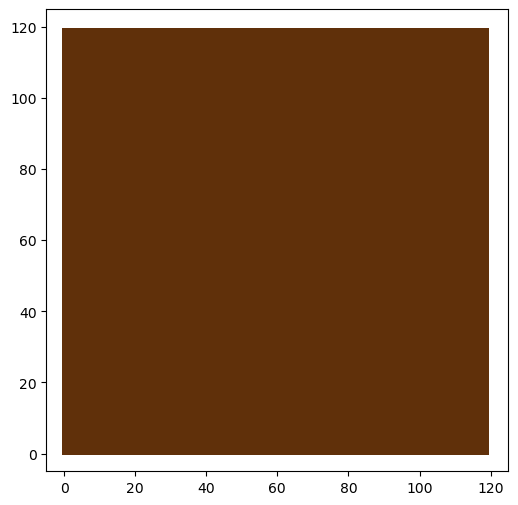

104 6612 731 1473


In [18]:
mischief = []

for i in range(8):
    ms = mickey()
    ms.set_allele(random.randint(0, 1),random.randint(0, 1))
    mischief.append(ms)
    
    ms = minnie()
    ms.set_allele(random.randint(0, 1),random.randint(0, 1))
    mischief.append(ms)    

## create a background of the prairie    
hill = np.zeros((120,120,3))
hill[:,:,0] = 0.38
hill[:,:,1] = 0.19
hill[:,:,2] = 0.04
    
wk = []
n_ml = []
n_md = []
    
# ## iterate over 40 time steps
for week in range(1,52*2+1):
  
    # the next 2 lines are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    
    plt.imshow(hill)
        
    # mice roaming and aging
    n_misch = []
    for ms in mischief:
        ms.roaming()
#         ms.draw()
        ms.aging()
        
        # old mice die
        if ms.age >= 50:
            del ms
        else:
            n_misch.append(ms)
            
    mischief.clear
    mischief = n_misch
    
      
    ## mating season every 13 weeks
    neo = []
    if np.mod(week,13) == 0 :
        # female mice
        for mf in mischief:
            if mf.sex == 'F':
                
                # male mice
                for mm in mischief:
                    if mm.sex == 'M':
                        # mate and litter
                        pups = mf.mate_litter(mm)    
                        
                    if len(pups) == 4:
                        break
                neo.extend(pups[0:4])
        
    # add new mice to the list
    mischief.extend(neo)
    
    ## the next 5 lines are for plotting
    plt.xlim(-5,125)
    plt.ylim(-5,125)
    plt.show()   
    time.sleep(0.001)      
    print("week = {0}, # of mouse = {1}".format(week, len(mischief)))
    
    
    
    
    # add you code to count mice population here
    
    # ANSWER =============================================== 
    # counting mice
    d_m = 0
    l_m = 0
    for ms in mischief:
            
        if ms.fur_color == 'dark':
            d_m += 1
            
        if ms.fur_color == 'light':
            l_m += 1
    
    wk.append(week)
    n_ml.append(l_m)
    n_md.append(d_m)
    
    # ANSWER =============================================== 
    

    
    
    

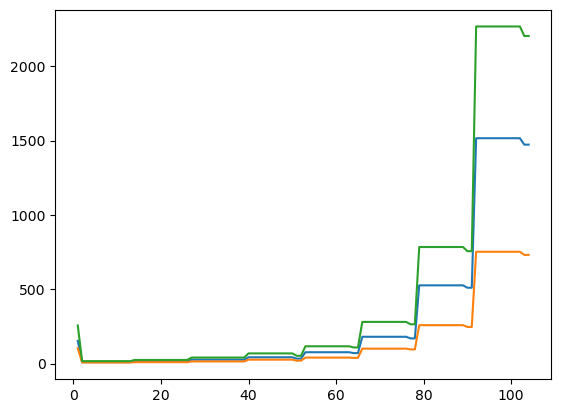

In [19]:
plt.plot(wk, n_ml)
plt.plot(wk, n_md)

mt = []
for i in range(len(wk)):
    mt.append(n_ml[i]+n_md[i])
    
    
plt.plot(wk,mt)
# plt.yscale("log")

**&#9989; Do this**:

Describe the simulated demographic evolution over time. What is the demographic distribution? Do they reflect your expectation? Without limitation of resources, does the total population exponentially grow?




---
### B.2.6 Natural preditors
Now, let's create a hawk class. This class have similar properties as those mouse classes. You can develop this class based on those above.
- Its initial position is randomly assigned within the hill.
- It has a `roaming()` method but the step distance is between -15 and 15. 
- It has a `draw()` method but make sure to use the `hawk.png` image.
- This class has a `hunt()` method. The input is a mouse object. 
 - If the distance between the hawk and mouse is less than 15, the hawk can potentially catch the mouse. 
 - If the mouse is light colored, the hawk has a 95% chance of catching the mouse.
 - If the mouse is dark colored, the hawk has a 5% chance of catching the mouse.
 - The ouput of the `hunt()` method is True or Fals for catch.

In [22]:
### put your code here

# ANSWER =============================================== 

class hawk():

    def __init__(self):
        
        self.x = random.randint(10, 110)
        self.y = random.randint(10, 110)
        
        
    def roaming(self):   
        
        dx = random.randint(-15, 15)
        dy = random.randint(-15, 15)
       
        self.x = self.x + dx
        self.y = self.y + dy        
       
        if ( self.x < 10 ):
            self.x = self.x + abs(dx)
            
        if ( self.x > 110 ):
            self.x = self.x - abs(dx) 
   
        if ( self.y < 10 ):
            self.y = self.y + abs(dy)
            
        if ( self.y > 110 ):
            self.y = self.y - abs(dy)  

    
    def draw(self):
        image_path = 'hawk.png'
        imscatter(self.x, self.y, image_path, zoom=0.8)       

        
        
    def hunt(self,prey):
        
        p_x = prey.x
        p_y = prey.y
        
        h_x = self.x
        h_y = self.y
        
        dst = math.sqrt((h_x-p_x)**2 + (h_y-p_y)**2)

        if dst < 15:
            val = random.random()
            if prey.fur_color == 'light':
                if val < 0.90:
                    catch = True
                else:
                    catch = False
                
            if prey.fur_color == 'dark':
                if val < 0.05:
                    catch = True
                else:
                    catch = False               
        else:
            catch = False
            
        return catch      
    
# ANSWER ===============================================     

Now let's test your hawk object in the cell below.

In [ ]:
kettles = [];
for h in range(5):
    kettles.append(hawk())    
    
    
# code below this line can draw the plot ========    
## create a background of the rockey hill    
hill = np.zeros((120,120,3))
hill[:,:,0] = 0.38
hill[:,:,1] = 0.19
hill[:,:,2] = 0.04
  

# loop over time, each time click is one week
for week in range(52):
    
    clear_output(wait=True)
    plt.figure(figsize=(6, 6))    
    plt.imshow(hill)    
    
    for hk in kettles:
        hk.roaming()
        hk.draw()
    
    
    plt.xlim(-5,125)
    plt.ylim(-5,125)
    plt.show()     

### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "final version of hawk", and push the changes to GitHub.

---

### B.2.7 Assemble the universe. 
At this point, you should have all the three classes (mickey, minnie, and hawk) done. Let's use the code cell to model the ecosystem. 
- Initialize 20 mickey and 20 minnie. 
- The system spans 208 weeks, (4 years). 
- To control/maintain mouse population, there are a couple of artificial constrants imposed. For example,
- Line 78--98
- Line 104--113
- Add your code to track the population of dark and light mice, female and male mice. Plot these mouse demogrphic evolution over time. 

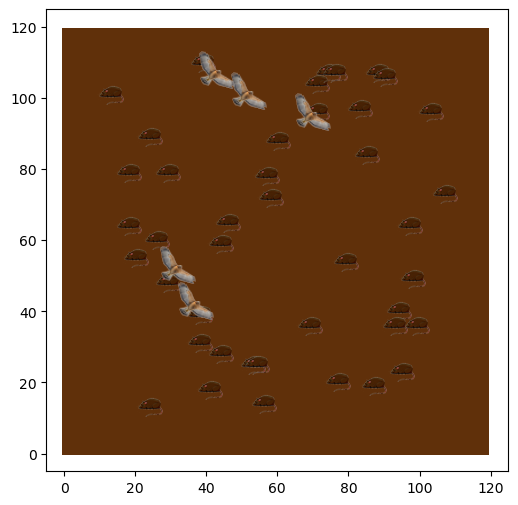

In [27]:
mischief = []
for i in range(20):
    ms = mickey()
    ms.set_allele(random.randint(0, 1),random.randint(0, 1))
    mischief.append(ms)

    ms = minnie()
    ms.set_allele(random.randint(0, 1),random.randint(0, 1))
    mischief.append(ms)      
    
kettles = [];
for h in range(5):
    kettles.append(hawk())   
    
    
## create a background of the prairie    
hill = np.zeros((120,120,3))
hill[:,:,0] = 0.38
hill[:,:,1] = 0.19
hill[:,:,2] = 0.04
    
    
wk = []
n_ml = []
n_md = []
n_fm = []
n_mm = []
    
# ## iterate over 204 time steps
for week in range(1,52*4+1):
  
    # the next 2 lines are for plotting
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    
    plt.imshow(hill)

    # mice roaming and aging
    n_misch = []
    for ms in mischief:
        
        ms.roaming()
        ms.draw()
        ms.aging()
            
        # old mice die
        if ms.age >= 50:
            del ms
        else:
            n_misch.append(ms)
  
    mischief.clear
    mischief = n_misch
    
    # hawks roaming and draw
    for hk in kettles:
        hk.roaming()
        hk.draw()

    ## To prevent mice from extinction, 
    ## hawk hunts only when mouse population is above 20.
    if len(mischief) > 20:
        n_misch = []
        for ms in mischief: 
            for hk in kettles:
                catch = hk.hunt(ms)             
                if catch == True:
                    break
                    
            if catch == True:
                del ms
            else:
                n_misch.append(ms)        
        
        mischief.clear
        mischief = n_misch
    
    ## mating season
    ## To control the total mouse population, 
    ## every minnie will litter when the total population is below 200.
    ## otherwise every other 10 minnie will litter.
    neo = []
    if np.mod(week,13) == 0 :
        if np.size(mischief) < 200:
            for mf in mischief:
                if mf.sex == 'F':
                    for mm in mischief:
                        if mm.sex == 'M':
                            pups = mf.mate_litter(mm)    
                            if np.size(pups) == 4:
                                break
                    neo.extend(pups[0:4])
        else:
            cnt = 0
            for mf in mischief:
                if mf.sex == 'F':    
                    cnt += 1
                    if np.mod(cnt,10) == 1:
                        for mm in mischief:
                            if mm.sex == 'M':
                                pups = mf.mate_litter(mm)    
                                if len(pups) == 4:
                                    break
                        neo.extend(pups[0:4])
        
        # add new mice to the list
        mischief.extend(neo)
            
    ## To prevent mouse extinction, 
    ## Add 10 couples of mice if the total population is below 10.
    if len(mischief) < 10:
        for i in range(10):
            ms = mickey()
            ms.set_allele(random.randint(0, 1),random.randint(0, 1))
            mischief.append(ms)
            
            ms = minnie()
            ms.set_allele(random.randint(0, 1),random.randint(0, 1))
            mischief.append(ms)
            
            
    
    ## the next 4 lines are for plotting
    plt.xlim(-5,125)
    plt.ylim(-5,125)
    plt.show()   
    time.sleep(0.001)      
 
         
    if np.size(mischief) <= 0:
        break
        
    

    # add you code to count mice population here
    
    # ANSWER =============================================== 
    # counting mice
    d_m = 0
    l_m = 0
    
    m_fem = 0
    m_mal = 0
    for ms in mischief:
            
        if ms.fur_color == 'dark':
            d_m += 1
            
        if ms.fur_color == 'light':
            l_m += 1
            
        if ms.sex == 'F':
            m_fem += 1
        
        if ms.sex == 'M':
            m_mal += 1
            
            
    wk.append(week)
    n_ml.append(l_m)
    n_md.append(d_m)   
    n_fm.append(m_fem)
    n_mm.append(m_mal)
    
    # ANSWER =============================================== 
      


    

Text(0.5, 0, 'week')

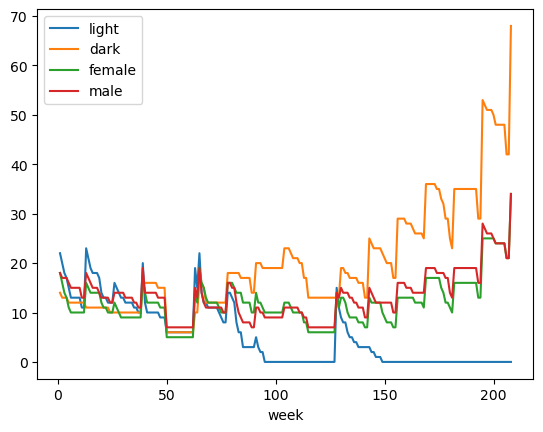

In [32]:
plt.plot(wk, n_ml)
plt.plot(wk, n_md)

plt.plot(wk, n_fm)
plt.plot(wk, n_mm)

plt.legend(['light','dark','female','male'])
plt.xlabel('week')

**&#9989; Do this**:

Describe your simulation results. Compare with **B.2.5**, does the presence of natural preditors make a natural selection on this hill?

**&#9989; Do this**:
Think about this agent-based model. You probably realize that simulations require both good code and good model.  Provide at least 1 potential improvement for the programming and at least 1 potential improvement for the model setup.

### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Done with Part B", and push the changes to GitHub.

---

## Part C. Graph and NetWorkX -- Ticket to ride

We will practice some skills of uisng pandas and netwrokX. The image below is from a popular table games, Ticket-to-Ride. There 36 cities on the map of north America. 

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/tt-inside2-940.png" border="0" align="center" width="680">
image found online.

At the end of this part, you should obtain a graph similar to the one below, which shows the shortest railway path from Boston to Las Vegas.
<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/example_graph.png" border="0" align="center" width="560">


Load required libraries

In [34]:
import numpy as np
import networkx as nx
import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

**&#9989; Do this**:
Download the two csv files.

`https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/data/City_coordates.csv`

`https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/data/Connectivity_matrix.csv`

In [51]:
# put your code here

!curl -O https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/data/City_coordates.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   798  100   798    0     0   2302      0 --:--:-- --:--:-- --:--:--  2306


### C.1 Import city data 
The `City_coordates.csv` file contains the city names, latitudes and logitudes. Use Pandas to import the data.

In [52]:
city = pd.read_csv('City_coordates.csv')

city


,cities,Lat,Long
0,Atlanta,33.4,-84.2
1,Boston,42.2,-71.0
2,Calgary,51.0,-114.0
3,Charleston,32.5,-79.5
4,Chicago,41.5,-87.4
5,Dallas,32.5,-96.5
6,Denver,39.4,-104.6
7,Duluth,46.5,-92.1
8,El Paso,31.5,-106.3
9,Helena,46.4,-112.1


### C.2. Plot cities as nodes on a graph
We will create a graph object using networkX. Add those cities as nodes to the graph and plot the network with city names as the labels. The latitude and logitude of each city will be used as the position of the node.

The cell below extract the city names to a list.

In [53]:
# get city names
c_list = city['cities'].to_list()

Acquire the city coordinates and draw the graph. ***Hint:*** `nx.draw(G, pos=c_locations, with_labels = True)`.  c_locations has a data type of dictionary, in which the keys are nodes and the values are the coordinates.

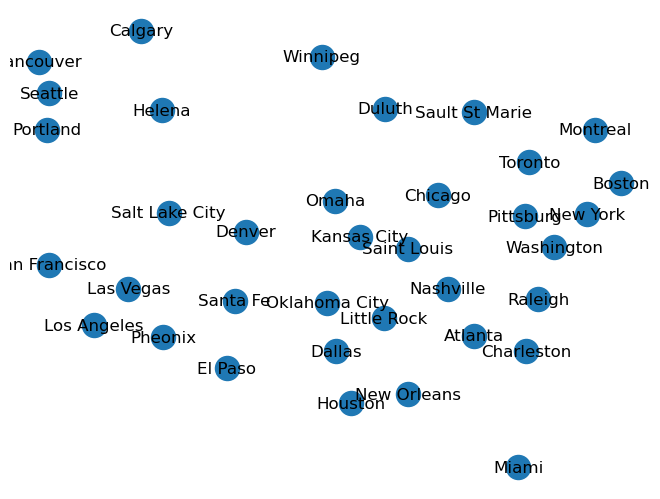

In [54]:
# put your code here

# create a graph
G = nx.Graph()


# ANSWER =============================================

# get latitude and longitude values from data frame
nLat = city['Lat'][:].to_numpy()
nLong = city['Long'][:].to_numpy()

# create a dictionary.
c_locations = {}

for i in range(len(c_list)):
    c_locations[c_list[i]] = (nLong[i], nLat[i])


# add nodes
for i in range(len(c_list)):
    G.add_node(c_list[i])

# plot the graph
nx.draw(G, pos=c_locations, with_labels = True)

# ANSWER =============================================

Import the data from Extract the connectivity matrix from the `Connectivity_matrix.csv` file and examine it. Value of 0 indicates no railraod connectionbetween the two cities. Value of 1 indicates two cities are connected with a railroad. This is in fact the adjancy matrix of this graph.

In [56]:
conM0 = pd.read_csv('Connectivity_matrix.csv')

conM0


,Unnamed: 0,Atlanta,Boston,Calgary,Charleston,Chicago,Dallas,Denver,Duluth,El Paso,...,Saint Louis,Salt Lake City,San Francisco,Santa Fe,Sault St Marie,Seattle,Toronto,Vancouver,Washington,Winnipeg
0,Atlanta,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Boston,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Calgary,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,Charleston,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chicago,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
5,Dallas,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,Denver,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7,Duluth,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
8,El Paso,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,Helena,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


Extract the connectivity matrix from the data. ***Hint:*** Drop the first column. Convert the data to numpy array.

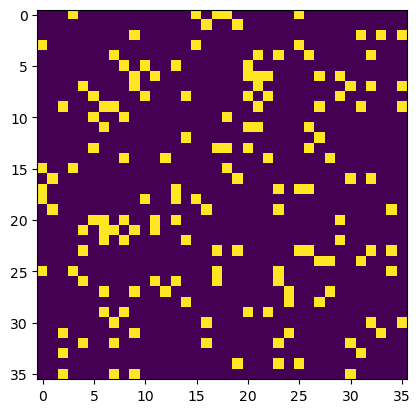

In [62]:
# put your code here

conM1 = conne0.drop(conne0.columns[0],axis = 1)
conM = conM1.to_numpy()

plt.imshow(conM)

In [39]:
rail = []
rail_dst = []
for i in range(np.shape(conM)[0]):
    for j in range(i+1,np.shape(conM)[1]):
        if conM[i,j] == 1:
            
            rLat1 = nLat[i]/(180.0/math.pi)
            rLon1 = nLong[i]/(180.0/math.pi)
            
            rLat2 = nLat[j]/(180.0/math.pi)
            rLon2 = nLong[j]/(180.0/math.pi)            
        
            distance =  1.609344*3963.0 * math.acos((math.sin(rLat1) * math.sin(rLat2)) + \
                                            math.cos(rLat1) * math.cos(rLat2) * math.cos(rLon2 - rLon1))
            
            rail.append((c_list[i],c_list[j]))
            rail_dst.append(round(distance))
            
edge_dict = {}
for i in range(len(rail)):
    edge_dict[rail[i]] = rail_dst[i]
    

for e in edge_dict.keys():
    G.add_edge(*e, weight=edge_dict[e])

# edge_dict

{('Atlanta', 'Charleston'): Text(-81.85, 32.95, '450'),
 ('Atlanta', 'Miami'): Text(-82.2, 29.6, '930'),
 ('Atlanta', 'Nashville'): Text(-85.35, 34.75, '367'),
 ('Atlanta', 'New Orleans'): Text(-87.15, 31.7, '675'),
 ('Atlanta', 'Raleigh'): Text(-81.30000000000001, 34.45, '581'),
 ('Boston', 'Montreal'): Text(-72.15, 43.75, '391'),
 ('Boston', 'New York'): Text(-72.5, 41.3, '321'),
 ('Calgary', 'Helena'): Text(-113.05, 48.7, '531'),
 ('Calgary', 'Seattle'): Text(-118.1, 49.2, '718'),
 ('Calgary', 'Vancouver'): Text(-118.55, 50.1, '679'),
 ('Calgary', 'Winnipeg'): Text(-105.9, 50.25, '1163'),
 ('Charleston', 'Miami'): Text(-79.85, 29.15, '749'),
 ('Charleston', 'Raleigh'): Text(-78.95, 34.0, '349'),
 ('Chicago', 'Duluth'): Text(-89.75, 44.0, '672'),
 ('Chicago', 'Omaha'): Text(-92.0, 41.35, '769'),
 ('Chicago', 'Pittsburg'): Text(-83.5, 40.9, '669'),
 ('Chicago', 'Saint Louis'): Text(-88.75, 39.95, '415'),
 ('Chicago', 'Toronto'): Text(-83.30000000000001, 42.45, '706'),
 ('Dallas', 'El 

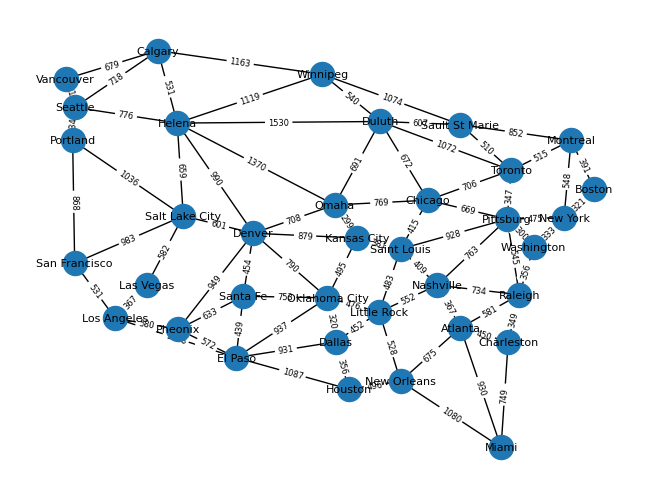

In [40]:
nx.draw(G, pos=c_locations, with_labels = True, font_size=8  )
nx.draw_networkx_edge_labels(G,pos=c_locations,edge_labels=edge_dict, font_size=6)

In [47]:
# path = nx.shortest_path(G,source='New York',target='Los Angeles')

path = nx.shortest_path(G,source='Boston',target='Las Vegas')
path

['Boston',
 'Montreal',
 'Sault St Marie',
 'Duluth',
 'Helena',
 'Salt Lake City',
 'Las Vegas']

In [48]:
path_edges = list(zip(path,path[1:]))
path_edges

[('Boston', 'Montreal'),
 ('Montreal', 'Sault St Marie'),
 ('Sault St Marie', 'Duluth'),
 ('Duluth', 'Helena'),
 ('Helena', 'Salt Lake City'),
 ('Salt Lake City', 'Las Vegas')]

{('Atlanta', 'Charleston'): Text(-81.85, 32.95, '450'),
 ('Atlanta', 'Miami'): Text(-82.2, 29.6, '930'),
 ('Atlanta', 'Nashville'): Text(-85.35, 34.75, '367'),
 ('Atlanta', 'New Orleans'): Text(-87.15, 31.7, '675'),
 ('Atlanta', 'Raleigh'): Text(-81.30000000000001, 34.45, '581'),
 ('Boston', 'Montreal'): Text(-72.15, 43.75, '391'),
 ('Boston', 'New York'): Text(-72.5, 41.3, '321'),
 ('Calgary', 'Helena'): Text(-113.05, 48.7, '531'),
 ('Calgary', 'Seattle'): Text(-118.1, 49.2, '718'),
 ('Calgary', 'Vancouver'): Text(-118.55, 50.1, '679'),
 ('Calgary', 'Winnipeg'): Text(-105.9, 50.25, '1163'),
 ('Charleston', 'Miami'): Text(-79.85, 29.15, '749'),
 ('Charleston', 'Raleigh'): Text(-78.95, 34.0, '349'),
 ('Chicago', 'Duluth'): Text(-89.75, 44.0, '672'),
 ('Chicago', 'Omaha'): Text(-92.0, 41.35, '769'),
 ('Chicago', 'Pittsburg'): Text(-83.5, 40.9, '669'),
 ('Chicago', 'Saint Louis'): Text(-88.75, 39.95, '415'),
 ('Chicago', 'Toronto'): Text(-83.30000000000001, 42.45, '706'),
 ('Dallas', 'El 

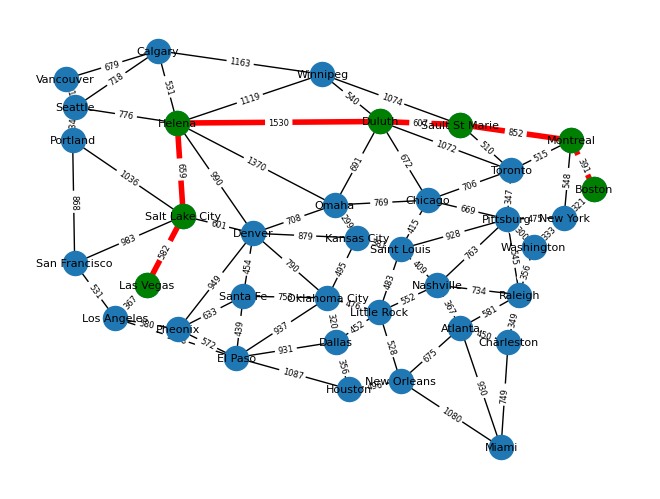

In [49]:
nx.draw(G, pos=c_locations, with_labels = True, font_size=8  )

nx.draw_networkx_nodes(G,pos=c_locations,nodelist=path,node_color='g')
nx.draw_networkx_edges(G,pos=c_locations,edgelist=path_edges,edge_color='r',width=4)
nx.draw_networkx_edge_labels(G,pos=c_locations,edge_labels=edge_dict, font_size=6)

In [ ]:
p = nx.dijkstra_path_length(G,'New York','Los Angeles')
p